In [ ]:
import os 
import pandas as pd 
import numpy as np
os.listdir('../input/lish-moa/')

In [ ]:
train_feats = pd.read_csv('../input/lish-moa/train_features.csv')
test_features = pd.read_csv('../input/lish-moa/test_features.csv')
train_targets_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
sample_submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
train_targets_nonscored = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')

In [ ]:
print('shape of train_feats             ....', train_feats.shape)
print('shape of train_targets_scored    ....', train_targets_scored.shape)
print('shape of train_targets_nonscored ....', train_targets_nonscored.shape)
print('shape of test_features           ....', test_features.shape) 
print('shape of sample_submission       ....', sample_submission.shape)

In [ ]:
print('number of unique sig_id ...', train_feats.sig_id.nunique())

## g-x and c-x features 

In [ ]:
train_feats[[c for c in train_feats.columns if 'g-' in c]]

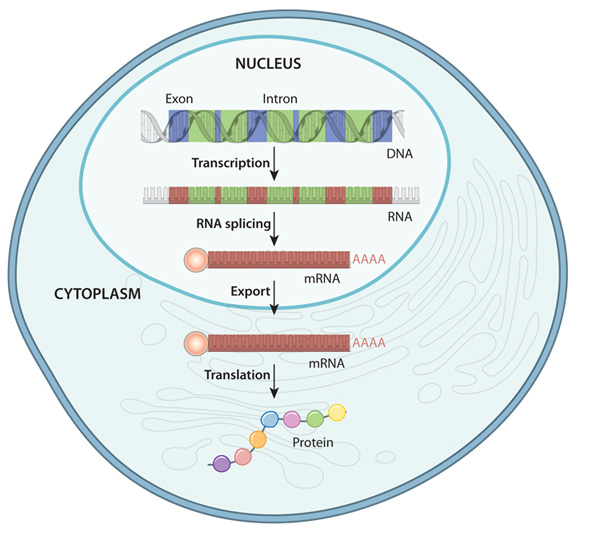

- g-x columns refers to the gene expression. We have 772 column specific for genes properties
- **Gene expression** is the process by which the information encoded in a gene is used to direct the assembly of a protein molecule. The cell reads the sequence of the gene in groups of three bases. [source](https://www.genome.gov/genetics-glossary/Gene-Expression#:~:text=%3D-,En%20Espa%C3%B1ol,in%20groups%20of%20three%20bases.)


In [ ]:
train_feats[[c for c in train_feats.columns if 'c-' in c]]

- c-x columns refers to the cell viability. We have 100 column specific for cell viability properties
- **Cell viability** is a measure of the proportion of live, healthy cells within a population. Cell viability assays are used to determine the overall health of cells, optimize culture or experimental conditions, and to measure cell survival following treatment with compounds, such as during a drug screen.[source](https://www.cellsignal.com/contents/_/synopsis-of-cell-proliferation-metabolic-status-and-cell-death/cell-viability-and-survival)


### What are you predicting? 

In [ ]:
train_targets_scored.head()

- Inputs: We are given 875 Features to use for label prediction. 
- Output: Predicted probability for each 207 labels that are taken into consideration in the scoring function.

## Class Imbalance 

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

def plot_labels(x_dict): 
    x = {k: v for k, v in sorted(x_dict.items(), key=lambda item: item[1], reverse=True)}
    keys = x.keys()
    vals = x.values()

    font = {'family': 'serif',
            'color':  'green',
            'weight': 'normal',
            'size': 16,
            }
    fig, ax = plt.subplots(figsize=(35, 10))
    plt.bar(keys, vals)
    plt.title('MoA Scored Labels ',fontdict=font)
    plt.ylabel ('Counts')
    plt.xlabel ('Labels')
    plt.xticks(list(keys))
    # plt.
    plt.show()


In [ ]:
labels = train_targets_scored.columns[1:].to_list()
plot_labels(train_targets_scored[labels].sum().to_dict())

As you can see here, we have a serious problem of class imbalance. Let's see the most popular labels a bit more closely.

In [ ]:
plot_labels({k:v for k,v in train_targets_scored[labels].sum().to_dict().items() if v>300})

In [ ]:
print('Most popular labels ....')
list({k:v for k,v in train_targets_scored[labels].sum().to_dict().items() if v>300}.keys())

## Conclusion

- Even if this is a tabular competion, it seems that we are dealing with a sequence problem. Eventially, we'll see top solution that may include deep learning besides gradient boosting machines or other algotithms. 
- We have a serious Class imbalance. Sampling should be carefully performed. 